In [0]:
import tensorflow as tf

from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#HERE WE LOAD THE DATASET, JUST DOGS AND CATS 
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

#we have all the data in a zip, so we need to extract and get the data path 
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

#there are validation and train, so we need two different paths to find them 
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

#inside of those packets we have the 2 data sets, cats and dogs, so we need to tag them 
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
#we will analize the data
num_cats_tr = len(os.listdir(train_cats_dir)) #this is the length of the images of cats to train
num_dogs_tr = len(os.listdir(train_dogs_dir)) #this is the length of the images of dogs to train

num_cats_val = len(os.listdir(validation_cats_dir)) #this is the length of the images of cats for validation
num_dogs_val = len(os.listdir(validation_dogs_dir)) #this is the length of the images of cats for validation

total_train = num_cats_tr + num_dogs_tr #total of pictures of validation
total_val = num_cats_val + num_dogs_val #total of pictures of train

print('total training cat images:', num_cats_tr) #print the numer of cat pictures to train 
print('total training dog images:', num_dogs_tr) #print the numer of dog pictures to train 

print('total validation cat images:', num_cats_val) #print the numer of cat pictures to valitation
print('total validation dog images:', num_dogs_val) #print the numer of dog pictures to validation
print("--")
print("Total training images:", total_train) #print the total numer of cat pictures 
print("Total validation images:", total_val) #print the total numer of dog pictures

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


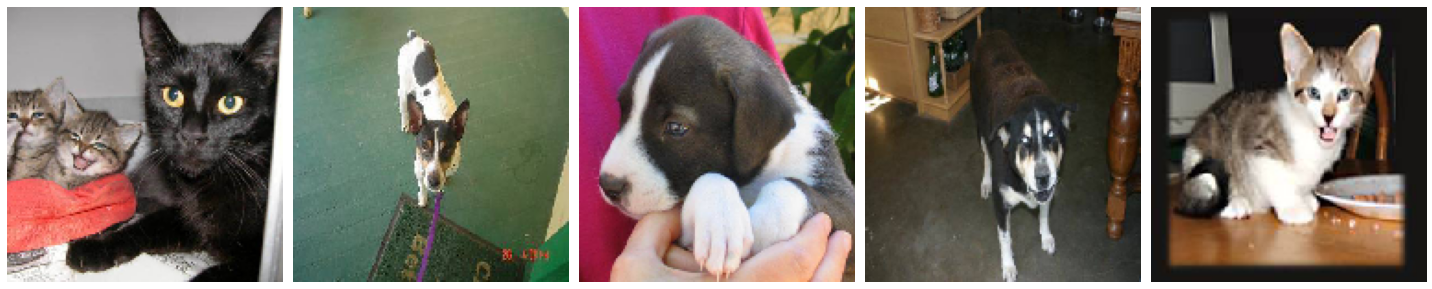

In [0]:
batch_size = 128 # number of samples that will be propagated through the network
epochs = 15 # numer of forward an backward pass for each batch_size
IMG_HEIGHT = 150 #height of the pictures
IMG_WIDTH = 150 #width of the pictures

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data and rescale 
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data and rescale
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, #prepare the data for training giving:
                                                           directory=train_dir, #address
                                                           shuffle=True,        
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH), #size
                                                           class_mode='binary') #the output

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, #prepare the data for validation giving:
                                                              directory=validation_dir, #address
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH), #size
                                                              class_mode='binary')      #output
#takes a image of the train data
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5]) #plot 5 images random of training dataset 


Found 2000 images belonging to 2 classes.


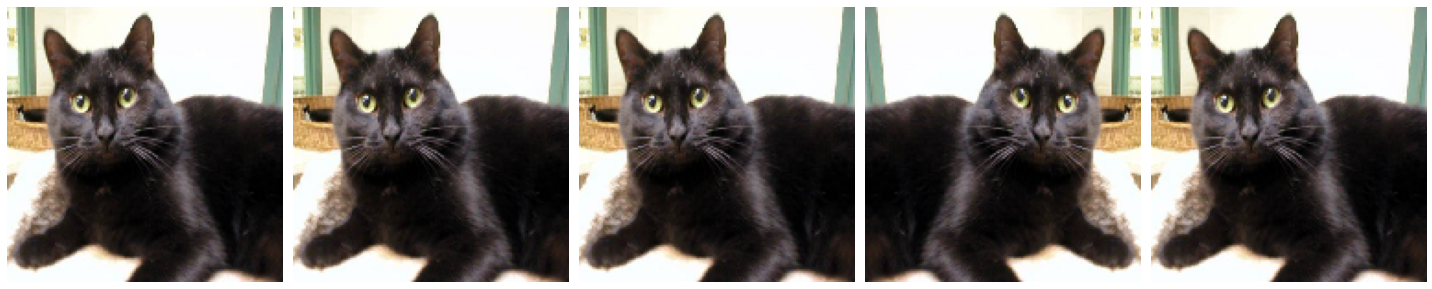

In [0]:
#we need to apply some variations at the images because the pictures are not always perfect, obviusly! :p
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


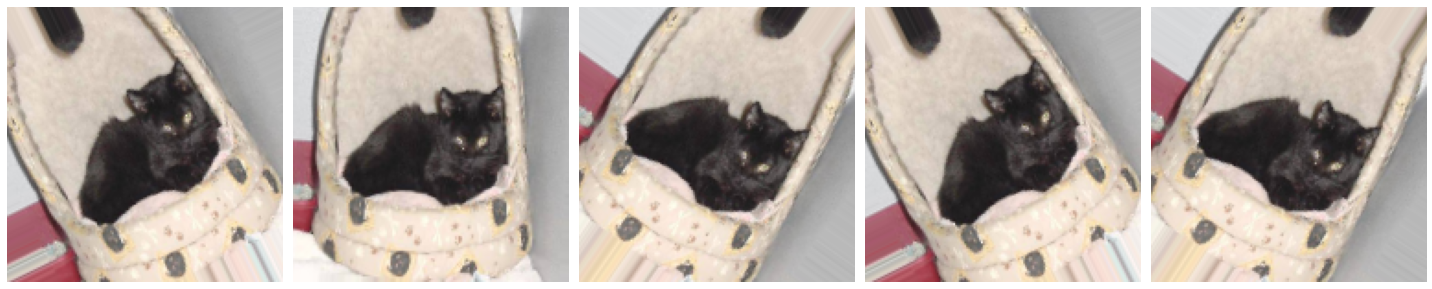

In [0]:
#morw of the same, but 45º
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


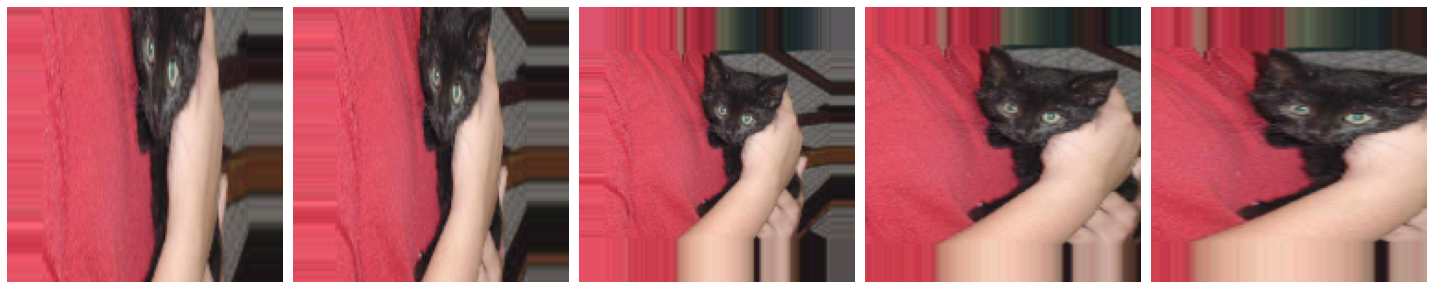

In [0]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) 
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


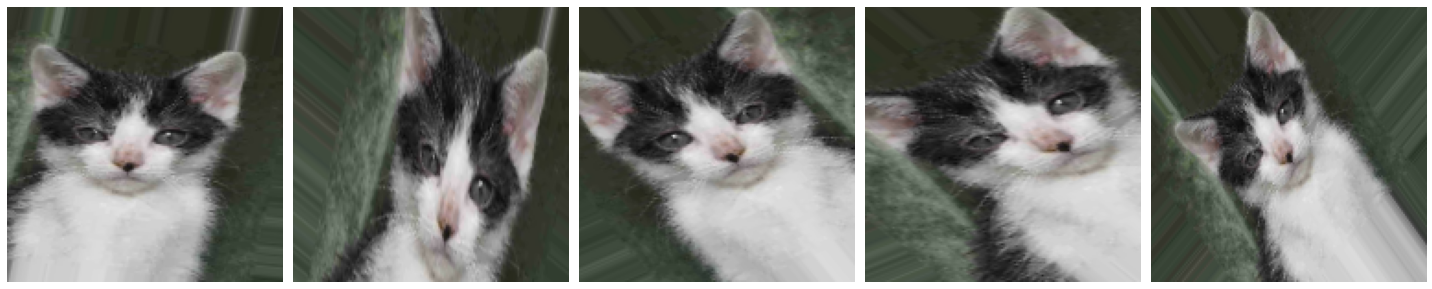

Found 1000 images belonging to 2 classes.


In [0]:
#all together 
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)
#in validation we don't do nothing because are an example of how real image should be
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


In [0]:

model_enfa = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', #convolution with 16 filterns of 3 of size
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),                                     #drop out of 20% to turn off 20% on neurons
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),                                   #drop out of 20% to turn off 20% on neurons
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1)
])


In [0]:
model_enfa.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_enfa.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [0]:
history = model_enfa.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 21s 1s/step - loss: 0.8936 - accuracy: 0.5037 - val_loss: 0.6928 - val_accuracy: 0.5112
Epoch 2/15
15/15 [==============================] - 17s 1s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5112
Epoch 3/15
15/15 [==============================] - 17s 1s/step - loss: 0.6918 - accuracy: 0.4957 - val_loss: 0.6901 - val_accuracy: 0.5112
Epoch 4/15
15/15 [==============================] - 17s 1s/step - loss: 0.6861 - accuracy: 0.5011 - val_loss: 0.6874 - val_accuracy: 0.5223
Epoch 5/15
15/15 [==============================] - 16s 1s/step - loss: 0.6835 - accuracy: 0.5043 - val_loss: 0.6842 - val_accuracy: 0.5268
Epoch 6/15
15/15 [==============================] - 16s 1s/step - loss: 0.6676 - accuracy: 0.5550 - val_loss: 0.6505 - val_accuracy: 

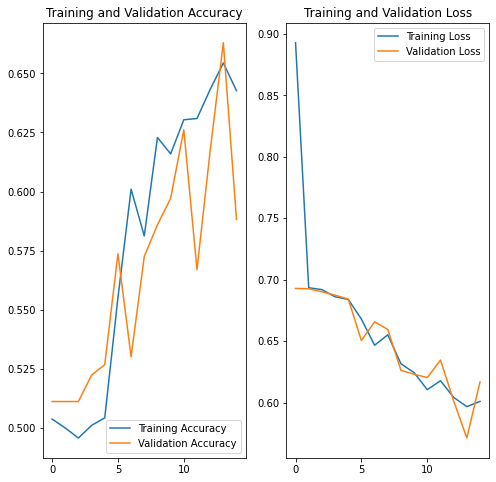

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

def predict(file):
  x = load_img(file, target_size=(150, 150))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model_enfa.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("pred: cat")
  elif answer == 1:
    print("pred: dog")
  return answer
predict('cat.4003.jpg')

pred: gato


0

In [0]:
import sys
import os
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model_enfa.save('./modelo/modelo.h5')
model_enfa.save_weights('./modelo/pesos.h5')